In [1]:
# タイタニック LightGBMを使用する

import os
import pandas as pd
import numpy as np

TITANIC_PATH = os.path.join("datasets", "titanic")

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [2]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# ワンホットエンコーディング

train_data = pd.get_dummies(train_data, columns=['Embarked'])
test_data = pd.get_dummies(test_data, columns=['Embarked'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [9]:
import seaborn as sns

# Pclassごとの生存者数
sns.countplot(train_data['Pclass'], hue=train_data['Survived'])

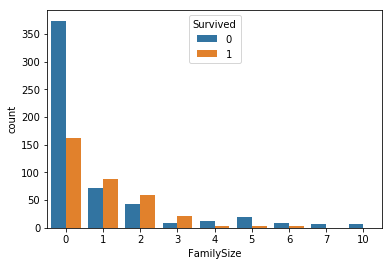

In [10]:
# 家族数(自分を除く)の作成
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp']
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp']
# 家族数ごとの分布を確認
sns.countplot(train_data['FamilySize'],hue=train_data['Survived'])

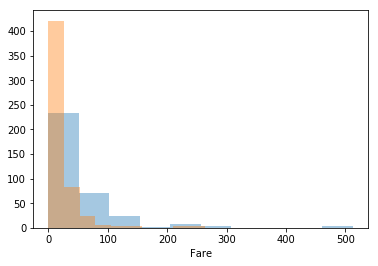

In [11]:
# Fareの可視化

sns.distplot(train_data[train_data['Survived']==1]['Fare'], kde=False, rug=False, bins=10) 
sns.distplot(train_data[train_data['Survived']==0]['Fare'], kde=False, rug=False, bins=10) 

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

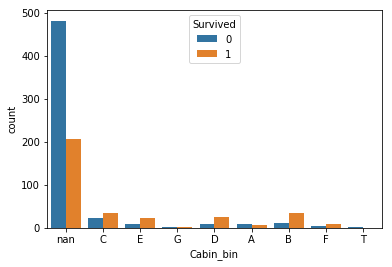

In [12]:
# Cabin 
print(train_data['Cabin'])

train_data['Cabin_bin'] = list(map(lambda x: x[0] if x != 'nan' else x,train_data['Cabin'].astype(str)))
test_data['Cabin_bin'] = list(map(lambda x: x[0] if x != 'nan' else x ,test_data['Cabin'].astype(str)))
# Cabinごとの分布を確認
sns.countplot(train_data['Cabin_bin'],hue=train_data['Survived'])

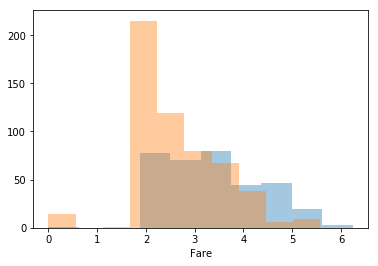

In [13]:
# Fareの対数変換
train_data['Fare'] = np.log1p(train_data['Fare'])
test_data['Fare'] = np.log1p(test_data['Fare'])

sns.distplot(train_data[train_data['Survived']==1]['Fare'],kde=False,rug=False,bins=10)
sns.distplot(train_data[train_data['Survived']==0]['Fare'],kde=False,rug=False,bins=10)

In [14]:
# Name列
train_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [15]:
# 敬称の抽出
train_data['h_title'] = list(map(lambda x: x.split(',')[1].split('.')[0].strip() ,train_data['Name']))
test_data['h_title'] = list(map(lambda x: x.split(',')[1].split('.')[0].strip() ,test_data['Name']))
df_h_title_tr = pd.Series(train_data['h_title'].value_counts(), name='train')
df_h_title_ts = pd.Series(test_data['h_title'].value_counts(), name='test')
pd.options.display.precision = 0
pd.concat([df_h_title_tr, df_h_title_ts], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,train,test
Capt,1,NaN
Col,2,2
Don,1,NaN
Dona,NaN,1
Dr,7,1
Jonkheer,1,NaN
Lady,1,NaN
Major,2,NaN
Master,40,21
Miss,182,78


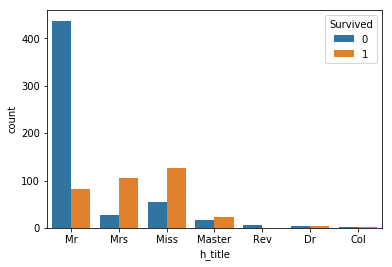

In [16]:
# 敬称の統合

train_data['h_title'].replace(['Sir', 'Capt'], 'Mr',inplace=True) # Mrへの統合
test_data['h_title'].replace(['Sir', 'Capt'], 'Mr',inplace=True) 
train_data['h_title'].replace(['Mme','Jonkheer','Lady','the Countess'], 'Mrs',inplace=True) # Mrsへの統合
test_data['h_title'].replace(['Mme','Jonkheer','Lady','the Countess'], 'Mrs',inplace=True) 
train_data['h_title'].replace('Mlle', 'Mrs',inplace=True) # Missへの統合
test_data['h_title'].replace('Mlle', 'Mrs',inplace=True)
train_data['h_title'].replace(['Dona','Don'], 'Rev',inplace=True) # Revへの統合
test_data['h_title'].replace(['Dona','Don'], 'Rev',inplace=True)
train_data['h_title'].replace('Major', 'Col',inplace=True) # Colへの統合
test_data['h_title'].replace('Major', 'Col',inplace=True)

# Msの分離
train_data.loc[~(train_data['SibSp'] == 0) & (train_data['h_title'] == 'Ms'), 'h_title'] = 'Miss'
test_data.loc[~(train_data['SibSp'] == 0) & (test_data['h_title'] == 'Ms'), 'h_title'] = 'Miss'
train_data.loc[~(train_data['SibSp'] > 0) & (train_data['h_title'] == 'Ms'), 'h_title'] = 'Mrs'
test_data.loc[~(train_data['SibSp'] > 0) & (test_data['h_title'] == 'Ms'), 'h_title'] = 'Mrs'

sns.countplot(train_data['h_title'], hue=train_data['Survived'])

In [17]:
from sklearn.preprocessing import LabelEncoder

# h_titleのラベルエンコード
cat_cols = ['h_title', 'Cabin_bin', 'Sex']

for c in cat_cols:
    le = LabelEncoder()
    train_data[c] = le.fit_transform(train_data[c])
    test_data[c] = le.fit_transform(test_data[c])

In [18]:
# drop PassengerId, Name, Ticket, Cabin
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

In [19]:
# 特徴量と目的変数に分離
train_label = train_data['Survived']
train_data.drop(['Survived'], axis=1, inplace=True)
test_X = test_data.copy()

In [20]:
from sklearn.model_selection import train_test_split

# hold-out法でtrainXを分割
train_X, valid_X, train_y, valid_y = train_test_split(train_data, train_label,
                                                     test_size=0.2, random_state=42, shuffle=True)

In [21]:
import lightgbm as lgb
from sklearn.metrics import log_loss

# データセットの生成
lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(valid_X, valid_y)

# ハイパーパラメータの設定
params = {'objective': 'binary'}
num_round = 100 # イテレーションの回数
stop_rounds = 20 # 早期打ち切りの上限

gbm = lgb.train(params, lgb_train, num_boost_round= num_round,
               valid_sets=[lgb_train, lgb_eval],verbose_eval=10,
               early_stopping_rounds=stop_rounds)

# Log Lossの表示
valid_pred = gbm.predict(valid_X)
score = log_loss(valid_y, valid_pred)
print(score)

Training until validation scores don't improve for 20 rounds
[10]	training's binary_logloss: 0.418205	valid_1's binary_logloss: 0.476774
[20]	training's binary_logloss: 0.335852	valid_1's binary_logloss: 0.423026
[30]	training's binary_logloss: 0.294795	valid_1's binary_logloss: 0.418239
[40]	training's binary_logloss: 0.256738	valid_1's binary_logloss: 0.414053
[50]	training's binary_logloss: 0.228596	valid_1's binary_logloss: 0.414348
Early stopping, best iteration is:
[35]	training's binary_logloss: 0.274578	valid_1's binary_logloss: 0.411573
0.41157279992842677


In [22]:
from sklearn.metrics import accuracy_score

# validを使った正解率
accuracy = accuracy_score(valid_y, (valid_pred > 0.5).astype(int))
print(accuracy)

0.8379888268156425


In [23]:
# 特徴量寄与度

importance = pd.DataFrame(gbm.feature_importance(), index=train_data.columns, columns=['importance'])
print(importance)

            importance
Pclass              41
Sex                 31
Age                345
Fare               335
Embarked_C          24
Embarked_Q           1
Embarked_S          13
FamilySize          48
Cabin_bin           29
h_title             44


In [24]:
# テストセットで評価

gbm_predictions = gbm.predict(test_X, num_iteration=gbm.best_iteration)

In [25]:
# datasetsディレクトリに結果を出力

result_out = load_titanic_data("test.csv")
result_out["Survived"] = (gbm_predictions > 0.5).astype(int) 
print(result_out)

submission_path = os.path.join(TITANIC_PATH, "submission.csv")
result_out[["PassengerId","Survived"]].to_csv(submission_path,index=False)

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon